## Importing Libraries

In [ ]:
#! pip install pandas
#! pip install pathlib
#! pip install numpy
#! pip install matplotlib

In [ ]:
# Importing relevant libraries
import pandas as pd
import numpy as np
from pathlib import Path
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import math
import csv

Mounted at /content/drive


# edit for ashley

## Defining Functions

In [ ]:
def remove_first(x):
  x =  x[1:]
  x = float(x)
  return x

def remove_last(x):
  x = x[:(len(x)-1)]
  x = float(x)
  return x

def revalue(x):
  if x >180:
    x= -(360-x)
  return x

In [ ]:
def process_data(filepath):
  
  b = pd.read_csv(filepath)

  b = b.iloc[3:]
  b = b.reset_index(drop=True)

  b.rename(columns={'Lapsed Time': 'Time'}, inplace=True)
  b.rename(columns={'Target Name': 'Target_Name'}, inplace=True)

  b['Time_Diff'] = b['Time'].diff()
  b['Time_Diff'] = b['Time_Diff'].apply(lambda x: max(0, x))

  b['X Euler Angle'] = b['X Euler Angle'].apply(remove_first)
  b['Z Euler Angle'] = b['Z Euler Angle'].apply(remove_last)

  b['X_A'] = b['X Euler Angle']
  b['Y_A'] = b['Y Euler Angle']
  b['Z_A'] = b['Z Euler Angle']

  b['X_A_Rev'] = b['X Euler Angle'].apply(revalue)
  b['Y_A_Rev'] = b['Y Euler Angle'].apply(revalue)
  b['Z_A_Rev'] = b['Z Euler Angle'].apply(revalue)

  b['X_A_Rev_Diff'] = abs(b['X_A_Rev'].diff())
  b['Y_A_Rev_Diff'] = abs(b['Y_A_Rev'].diff())
  b['Z_A_Rev_Diff'] = abs(b['Z_A_Rev'].diff())

  # Removing all rows that say Mission Complete
  label_to_remove = 'Mission complete'
  b = b[b['Target_Name'] != label_to_remove]

  b.fillna(0, inplace=True)

  b_df = b[['Target_Name', 'X', 'Z', 'X_A', 'X_A_Rev', 'X_A_Rev_Diff', 'Y_A', 'Y_A_Rev', 'Y_A_Rev_Diff', 'Z_A', 'Z_A_Rev', 'Z_A_Rev_Diff', 'Time', 'Time_Diff']].copy()
  
  return b_df 

In [ ]:
def compcsv():
  fp = '/content/drive/MyDrive/2 - Organizations/NPRL Lab Drive/2 - People & Research/BNC Team/6 - Data & Analysis/Data/' + PI
  #Block 1
  B1 = fp  +'/Saved_data_'+ PI + '_t1.csv'
  df1 = pd.read_csv(B1)
  df1 = df1.drop_duplicates(subset = ['X','Z','Target Name'],keep = ('last'))
  df1 = df1.loc[df1['Target Name']== str(target)]
  print('Total Distance Per Block:', df1.to_csv(filepath_B1,mode = 'a'))
  #Block 2
  B2 = fp  +  '/Saved_data_' +PI + '_t2.csv'
  df2 = pd.read_csv(B2)
  df2 = df2.drop_duplicates(subset = ['X','Z','Target Name'],keep = ('last'))
  df2 = df2.loc[df2['Target Name']== str(target)]
  print('Total Distance Per Block:', df2.to_csv(filepath_B2,mode = 'a'))
  #Block 1
  B3 = fp  + '/Saved_data_'+PI + '_t3.csv'
  df3 = pd.read_csv(B3)
  df3 = df3.drop_duplicates(subset = ['X','Z','Target Name'],keep = ('last'))
  df3 = df3.loc[df3['Target Name']== str(target)]
  print('Total Distance Per Block:', df3.to_csv(filepath_B3,mode = 'a'))

In [ ]:
def setcsv():
  fp = '/content/drive/MyDrive/2 - Organizations/NPRL Lab Drive/2 - People & Research/BNC Team/6 - Data & Analysis/Data/' +PI
  #Block 1
  B1 = fp  + '/Saved_data_'+PI + '_t1.csv'
  df1 = pd.read_csv(B1)
  df1 = df1.drop_duplicates(subset = ['X','Z','Target Name'],keep = ('last'))
  df1 = df1.loc[df1['Target Name']== str(target)]
  print('Total Distance Per Block:'+PI , df1.to_csv(filepath_B1,mode = 'a', header=False))
  #Block 2
  B2 = fp  + '/Saved_data_'+PI + '_t2.csv'
  df2 = pd.read_csv(B2)
  df2 = df2.drop_duplicates(subset = ['X','Z','Target Name'],keep = ('last'))
  df2 = df2.loc[df2['Target Name']== str(target)]
  print('Total Distance Per Block:', df2.to_csv(filepath_B2,mode = 'a', header=False))
  #Block 1
  B3 = fp  + '/Saved_data_'+PI + '_t3.csv'
  df3 = pd.read_csv(B3)
  df3 = df3.drop_duplicates(subset = ['X','Z','Target Name'],keep = ('last'))
  df3 = df3.loc[df3['Target Name']== str(target)]
  print('Total Distance Per Block:', df3.to_csv(filepath_B3,mode = 'a',header=False))

In [ ]:
# This Code Chunk work specifically to collect any information that necessitates used input
#PI is the variable related to the participant ID
PI = 'BNC'+ input('num:')
target = 'Police station '
#target = input('Target:')
#fp is the variable related to the file path of the folder containing all of one participant's data
#fp = '/content/drive/MyDrive/2 - Organizations/NPRL Lab Drive/2 - People & Research/BNC Team/6 - Data & Analysis/Data/' +PI
#fp1 = '/content/drive/MyDrive/Organizations/NPRL Lab Drive/2 - People & Research/BNC Team/Data & Analysis/Data'
#B1 is the variable assoicated with the file containing information from Block 1
#B1 = fp  +'/Saved_data_'+ PI + '_t1.csv'
#B2 is the variable assoicated with the file containing information from Block 2
#B2 = fp  +  '/Saved_data_' +PI + '_t2.csv'
#B3 is the variable assoicated with the file containing information from Block 3
#B3 = fp  + '/Saved_data_'+PI + '_t3.csv'
filepath_B1 = Path('/content/drive/MyDrive/2 - Organizations/NPRL Lab Drive/2 - People & Research/AK/1 - Projects/4 - Cognitive Map/path_data/'+target+'_B1_data_analysis.csv')
filepath_B2 = Path('/content/drive/MyDrive/2 - Organizations/NPRL Lab Drive/2 - People & Research/AK/1 - Projects/4 - Cognitive Map/path_data/'+target+'_B2_data_analysis.csv')
filepath_B3 = Path('/content/drive/MyDrive/2 - Organizations/NPRL Lab Drive/2 - People & Research/AK/1 - Projects/4 - Cognitive Map/path_data/'+target+'_B3_data_analysis.csv')
#filepath = Path(fp1 + '/distance_travelled.csv')
filepath_B1.parent.mkdir(parents=True, exist_ok=True)
filepath_B2.parent.mkdir(parents=True, exist_ok=True)
filepath_B3.parent.mkdir(parents=True, exist_ok=True)



num:01


NameError: ignored

#Runs through all BNC files

In [ ]:
# This Code Chunk work specifically to collect any information that necessitates used input
#PI is the variable related to the participant ID
idnum = 2
while idnum<10:
  PI = 'BNC0'+ str(idnum)
  setcsv()
  idnum+=1

Total Distance Per Block:BNC02 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC03 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC04 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC05 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC06 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC07 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC08 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC09 None
Total Distance Per Block: None
Total Distance Per Block: None


In [ ]:
idnum = 10
while idnum<21:
  PI = 'BNC'+ str(idnum)
  setcsv()
  idnum+=1

Total Distance Per Block:BNC10 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC11 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC12 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC13 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC14 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC15 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC16 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC17 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC18 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC19 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per B

In [ ]:
idnum = 23
while idnum<48:
  PI = 'BNC'+ str(idnum)
  setcsv()
  idnum+=1

Total Distance Per Block:BNC23 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC24 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC25 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC26 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC27 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC28 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC29 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC30 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC31 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per Block:BNC32 None
Total Distance Per Block: None
Total Distance Per Block: None
Total Distance Per B

#Running Graph Drawing


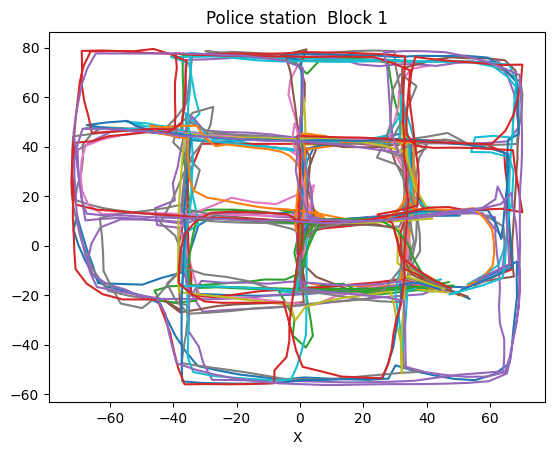

In [ ]:
# This section of code defines a function that is used to create the graph png for the block data
target = 'Police station '
BI1 = '/content/drive/MyDrive/2 - Organizations/NPRL Lab Drive/2 - People & Research/AK/1 - Projects/4 - Cognitive Map/path_data/'+target+'_B1_data_analysis.csv'
BI2 = '/content/drive/MyDrive/2 - Organizations/NPRL Lab Drive/2 - People & Research/AK/1 - Projects/4 - Cognitive Map/path_data/'+target+'_B2_data_analysis.csv'
BI3 = '/content/drive/MyDrive/2 - Organizations/NPRL Lab Drive/2 - People & Research/AK/1 - Projects/4 - Cognitive Map/path_data/'+target+'_B3_data_analysis.csv'
def GraphMovement(block,name):
  df = pd.read_csv(block)
  df = df.drop_duplicates(subset = ['X','Z','ParticipantID'],keep = ('last'))
  df = df[:-1]
  mp.title(target + ' ' + name)
  #ax = mp.axes()
  df.set_index('X', inplace = True)
  #ax.set_xlabel('x position in maze')
  #ax.set_ylabel('y position in maze')
  #ax.set_xlim(-80,80)
  #ax.set_ylim(-60,80)
  ax = df.groupby('ParticipantID')['Z'].plot(legend=False)
  imagepath = Path('/content/drive/MyDrive/2 - Organizations/NPRL Lab Drive/2 - People & Research/AK/1 - Projects/4 - Cognitive Map/path_data/block maps/'+ target + '_' + name+ '.png')
  imagepath.parent.mkdir(parents=False, exist_ok=True)
  mp.savefig(imagepath)
GraphMovement(BI1, 'Block 1')


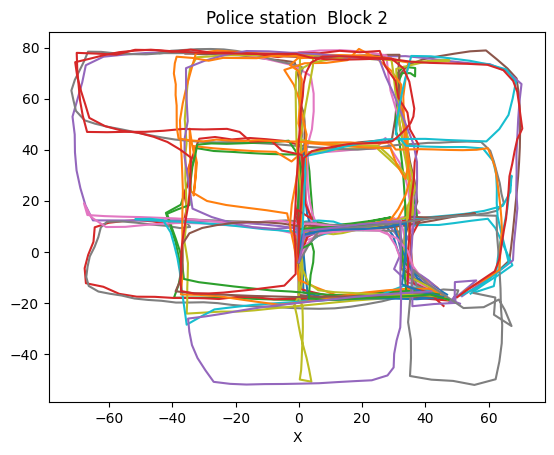

In [ ]:
# This section of code runs the prior function to produce and save a png of the graph data in block 1
GraphMovement(BI2, 'Block 2')


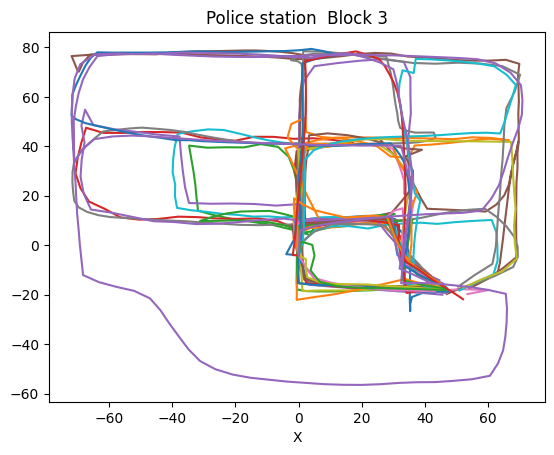

In [ ]:
# This section of code runs the prior function to produce and save a png of the graph data in block 2
GraphMovement(BI3, 'Block 3')
